## 作業

目標: 建立一深度學習模型預測客戶是否流失

- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fubondl/master/data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.select_dtypes('object').head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [5]:
len(df['Surname'].unique())

2932

In [7]:
len(df['Geography'].unique())

3

In [8]:
len(df['Gender'].unique())

2

In [9]:
df = df.iloc[:,3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
geo = pandas.get_dummies(df['Geography'])
del geo['Spain']
geo.head()

,France,Germany
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [14]:
gender = pandas.get_dummies(df['Gender'])
gender.head()
del gender['Male']
gender.head()

,Female
0,1
1,1
2,1
3,1
4,1


In [16]:
df = pandas.concat([geo, gender, df], axis = 1)
del df['Gender']
del df['Geography']

In [17]:
df.head()

,France,Germany,Female,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,1,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,1,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,1,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   France           10000 non-null  uint8  
 1   Germany          10000 non-null  uint8  
 2   Female           10000 non-null  uint8  
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42 )

In [21]:
train_X.shape

(8000, 11)

In [22]:
test_X.shape

(2000, 11)

In [23]:
train_y.shape

(8000,)

In [24]:
test_y.shape

(2000,)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [27]:
train_X[0:3]

array([[ 1.00150113, -0.57946723, -0.91324755,  0.35649971, -0.6557859 ,
         0.34567966, -1.21847056,  0.80843615,  0.64920267,  0.97481699,
         1.36766974],
       [-0.99850112,  1.72572313, -0.91324755, -0.20389777,  0.29493847,
        -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,  0.97481699,
         1.6612541 ],
       [-0.99850112, -0.57946723, -0.91324755, -0.96147213, -1.41636539,
        -0.69539349,  0.61862909, -0.91668767,  0.64920267, -1.02583358,
        -0.25280688]])

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense, Dropout

In [53]:
model = Sequential()
model.add(Dense(6, activation = 'relu', input_shape=(11,)))
model.add(Dropout(rate=0.1))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation= 'sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_y,
                    batch_size = 32, 
                    epochs = 100,
                    validation_data = (test_X, test_y))

In [82]:
model.predict(test_X).flatten()

array([0.05042278, 0.05163375, 0.17906581, ..., 0.72532964, 0.1614057 ,
       0.24536137], dtype=float32)

In [57]:
pred_y = (model.predict(test_X) > 0.5).flatten().astype(int)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)

0.861

In [59]:
confusion_matrix(test_y, pred_y)

array([[1551,   56],
       [ 222,  171]])

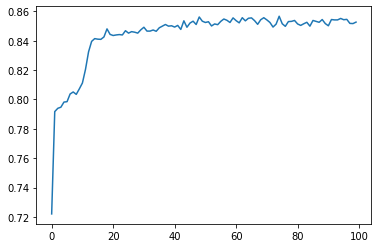

In [61]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))),history.history.get('accuracy'))

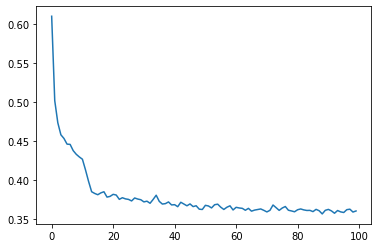

In [62]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))),history.history.get('loss'))

In [63]:
pred_y2 = model.predict(test_X).flatten()

In [65]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(test_y, pred_y2)

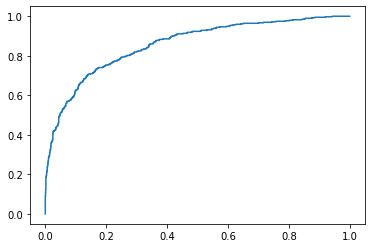

In [66]:
plt.plot(fpr, tpr)

In [68]:
auc(fpr, tpr)

0.8575491132149264

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

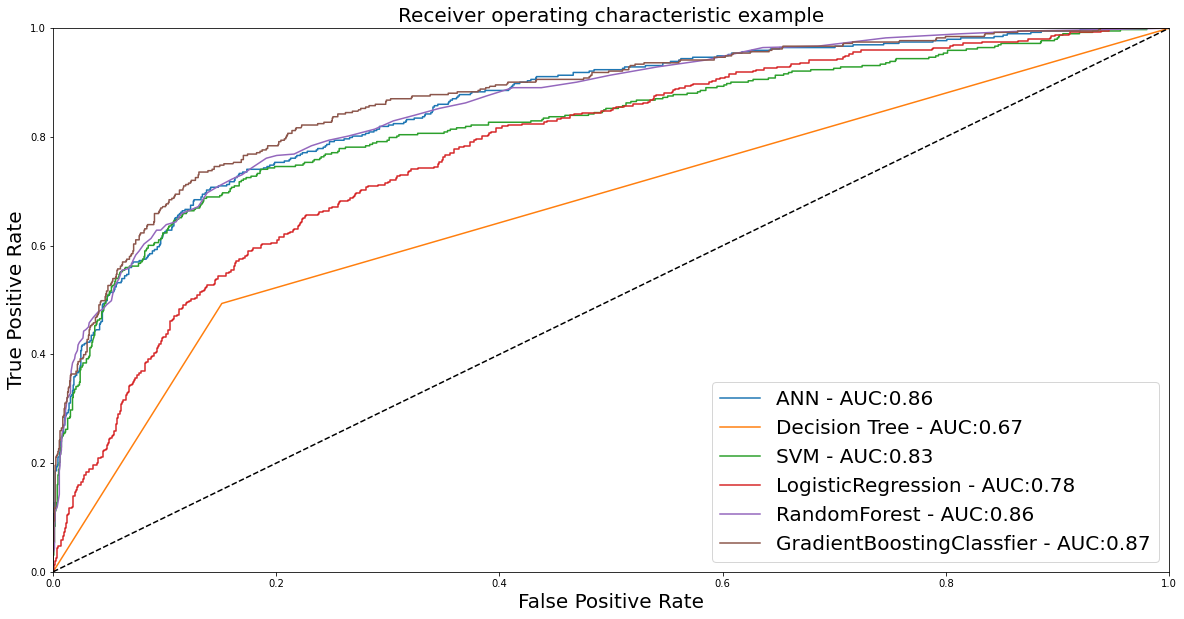

In [70]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4, clf5], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoostingClassfier']):
    if title != 'ANN':
        probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        pred_y = clf.predict(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, pred_y)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


In [78]:
from sklearn.preprocessing import StandardScaler
import numpy as np
a = np.array([50,60,70])
a.mean(), a.std()


(60.0, 8.16496580927726)

In [79]:
(a - a.mean()) / a.std()

array([-1.22474487,  0.        ,  1.22474487])

In [77]:
sc = StandardScaler()
sc.fit(a.reshape(-1,1))
sc.mean_, sc.var_

(array([60.]), array([66.66666667]))

In [80]:
sc.transform(a.reshape(-1,1))

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [83]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fubondl/master/data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
list(df.select_dtypes('object').columns)

['Surname', 'Geography', 'Gender']

In [91]:
#df.drop(list(df.select_dtypes('object').columns), axis = 1)

In [96]:
#?df.filter

## CNN

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [6]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
from tensorflow.keras.utils import to_categorical
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test  = to_categorical(y_test, n_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size      = 100

In [40]:
model = Sequential()

# Convolution
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
model.add(Flatten())

# Fully Connected
model.add(Dense(n_hidden_1, activation='relu'))

model.add(Dense(n_classes, activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               803072    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4041 - accuracy: 0.8873 - val_loss: 0.0804 - val_accuracy: 0.9766
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0533 - val_accuracy: 0.9819
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0506 - val_accuracy: 0.9832
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0482 - val_accuracy: 0.9842
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0417 - val_accuracy: 0.9858
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0453 - val_accuracy: 0.9847
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.0469 - val_accuracy: 0.9861
Epoch 

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               803072    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
_________________________________________________________________


In [22]:
! wget https://raw.githubusercontent.com/ywchiu/fubondl/main/CNN/4.jpg

--2021-01-08 07:24:37--  https://raw.githubusercontent.com/ywchiu/fubondl/main/CNN/4.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1078 (1.1K) [image/jpeg]
Saving to: ‘4.jpg’

4.jpg               100%[===================>]   1.05K  --.-KB/s    in 0s      

2021-01-08 07:24:37 (49.6 MB/s) - ‘4.jpg’ saved [1078/1078]



In [24]:
from PIL import Image
Image.open('4.jpg')

In [25]:
img = Image.open('4.jpg').convert('L')

import numpy
img  = numpy.asarray(img)
img.shape

(28, 28)

In [28]:
img2 = img.reshape((1,28,28,1))
img2.shape

(1, 28, 28, 1)

In [29]:
img3 = (255 - img2) / 255

In [30]:
img3.shape

(1, 28, 28, 1)

In [33]:
import numpy as np
np.argmax(model.predict(img3))

4

## Human Face Detection

### Image Data Collection

In [46]:
def getPicture(path, url):
  res = requests.get(url)
  with open('{}/{}.jpg'.format(path, url.split('u=')[1].split('&')[0]) , 'wb') as f:
    f.write(res.content)

In [53]:
headers = {
 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest'   
}
baidu_url = 'https://image.baidu.com/search/acjson?tn=resultjson_com&logid=10445197664479484348&ipn=rj&ct=201326592&is=&fp=result&queryWord={}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=&hd=&latest=&copyright=&word={}&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&pn={}&rn=30&gsm=3c&1610093186132='
def getIdolImage(path, term, pagenum):
  if not os.path.exists(path):
    os.mkdir(path)
  for p in range(pagenum):
    res = requests.get(baidu_url.format(term, term, pagenum * 30), headers = headers)
    jd = res.json()
    for img in jd['data']:
      if img.get('middleURL'):
        getPicture(path, img.get('middleURL'))

In [54]:
getIdolImage('eso', '頑童瘦子', 3)

In [55]:
getIdolImage('weber', '潘瑋柏', 3)

In [56]:
getIdolImage('mchotdog', 'mchotdog', 3)

In [90]:
getIdolImage('zhiyu', '周子瑜', 3)

In [91]:
getIdolImage('manny', '江疏影', 3)

In [92]:
getIdolImage('pu', '朴信惠', 3)

In [ ]:
! cat manny/1054

In [93]:
! ls manny/ | grep 1054

1054143727,990760535.jpg


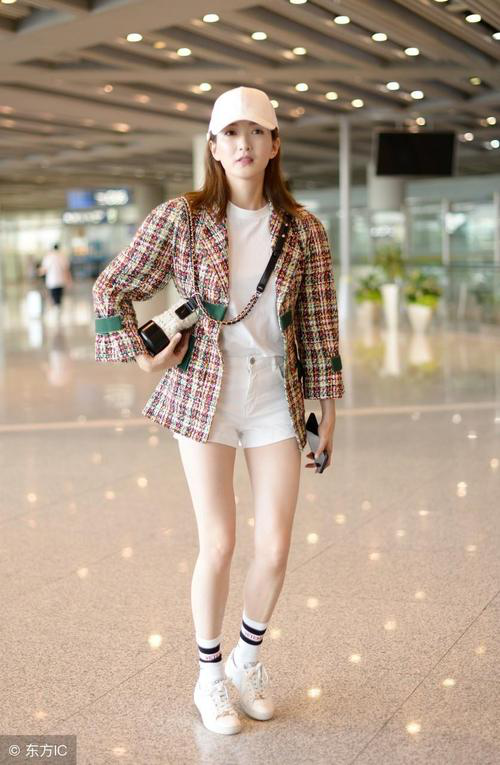

In [95]:
from PIL import Image
img = Image.open('manny/1054143727,990760535.jpg')
img

## Face Cropping

In [96]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2021-01-08 08:34:18--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-01-08 08:34:18 (21.6 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [97]:
import cv2 as cv
im = cv.imread('manny/1054143727,990760535.jpg')
im.shape

(765, 500, 3)

In [98]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(im, 1.3, 5)
faces

array([[204, 103,  78,  78]], dtype=int32)

In [99]:
x,y,w,h = faces[0]

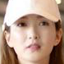

In [100]:
box     = (x, y, x+w, y+h)
crpim   = img.crop(box).resize((64,64))
crpim

In [101]:
import os
def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
          try:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)
          except:
            pass

In [102]:
cropIdolFace('zhiyu/', 'zhiyu_face/')

In [103]:
cropIdolFace('manny/', 'manny_face/')

In [104]:
cropIdolFace('pu/', 'pu_face/')

## Train CNN Model

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(filters=32, 
           kernel_size=(3, 3),  
           padding = 'same',
           input_shape = (64, 64, 3),
           activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(filters=32, 
          kernel_size=(3, 3), 
          padding = 'same', 
          activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 1024, activation = 'relu')) 
classifier.add(Dropout(rate=0.2)) 
classifier.add(Dense(units = 512, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 256, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

In [126]:

classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)             

In [127]:
classifier.compile(optimizer = 'adam', 
          loss ='categorical_crossentropy', 
          metrics = ['accuracy'])

## Data Augmentation

In [110]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
           rescale = 1./255,
           shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
           zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
           horizontal_flip = True #水平翻转操作
         )

In [111]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [112]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [113]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.33, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [114]:
splitDataset('zhiyu_face/')

In [115]:
splitDataset('manny_face/')

In [116]:
splitDataset('pu_face/')

In [117]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 47 images belonging to 3 classes.


In [118]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 16, 
    class_mode = 'categorical')

Found 24 images belonging to 3 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                  epochs=150,
                  verbose = 1,
                  validation_data = test_set)

In [131]:
! wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/0dc64c5608eb4764a54a85a73371638f-1595814800.jpeg

--2021-01-08 08:57:48--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/0dc64c5608eb4764a54a85a73371638f-1595814800.jpeg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65501 (64K) [image/jpeg]
Saving to: ‘0dc64c5608eb4764a54a85a73371638f-1595814800.jpeg’

0dc64c5608eb4764a54 100%[===================>]  63.97K  --.-KB/s    in 0.004s  

2021-01-08 08:57:49 (16.9 MB/s) - ‘0dc64c5608eb4764a54a85a73371638f-1595814800.jpeg’ saved [65501/65501]



In [135]:
from PIL import Image
img = Image.open('0dc64c5608eb4764a54a85a73371638f-1595814800.jpeg')

In [132]:
import cv2 as cv
im = cv.imread('0dc64c5608eb4764a54a85a73371638f-1595814800.jpeg')
im.shape

(960, 640, 3)

In [133]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(im, 1.3, 5)
faces

array([[285, 223, 138, 138]], dtype=int32)

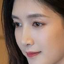

In [136]:
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = img.crop(box).resize((64,64))
crpim

In [137]:
crpim.save('predict_face.png')

In [138]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('predict_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [139]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [140]:
classifier.predict_classes(test_image)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

In [141]:
training_set.class_indices

{'manny_face': 0, 'pu_face': 1, 'zhiyu_face': 2}